<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/type2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n
# gill-spacing: close=c,crowded=w,distant=d
# gill-size: broad=b,narrow=n
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u
# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
import pandas as pd

rawdata = pd.read_csv('https://raw.githubusercontent.com/kmouleejunhyuk/bigdata_analysist_practical/main/mushrooms.csv')

#Q: 데이터를 기반으로 class를 예측하라

##EDA

In [3]:
rawdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
rawdata.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
rawdata.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
rawdata.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
rawdata.duplicated().sum()

0

In [8]:
#변수가 모두 범주형이므로 컬럼 별 비율을 확인
s = rawdata.shape
print(s)

for c in rawdata.columns:
    tmp = rawdata[c].value_counts()

    r_list = []
    index = tmp.index
    for ind in index:
        r_list.append(round(tmp[ind] / s[0], ndigits = 3))

    tmp = pd.DataFrame(tmp.values, columns = ['count'])
    tmp['ratio'] = r_list
    tmp.index = index

    print(c)
    print(tmp, end = '\n\n')

(8124, 23)
class
   count  ratio
e   4208  0.518
p   3916  0.482

cap-shape
   count  ratio
x   3656  0.450
f   3152  0.388
k    828  0.102
b    452  0.056
s     32  0.004
c      4  0.000

cap-surface
   count  ratio
y   3244  0.399
s   2556  0.315
f   2320  0.286
g      4  0.000

cap-color
   count  ratio
n   2284  0.281
g   1840  0.226
e   1500  0.185
y   1072  0.132
w   1040  0.128
b    168  0.021
p    144  0.018
c     44  0.005
r     16  0.002
u     16  0.002

bruises
   count  ratio
f   4748  0.584
t   3376  0.416

odor
   count  ratio
n   3528  0.434
f   2160  0.266
y    576  0.071
s    576  0.071
a    400  0.049
l    400  0.049
p    256  0.032
c    192  0.024
m     36  0.004

gill-attachment
   count  ratio
f   7914  0.974
a    210  0.026

gill-spacing
   count  ratio
c   6812  0.839
w   1312  0.161

gill-size
   count  ratio
b   5612  0.691
n   2512  0.309

gill-color
   count  ratio
b   1728  0.213
p   1492  0.184
w   1202  0.148
n   1048  0.129
g    752  0.093
h    732  0.090

In [9]:
#veil 값이 단일값이기 때문에, 삭제
droped_data = rawdata.copy()
droped_data.drop(['veil-type'], axis = 1, inplace = True)
droped_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l


##preprocessing

In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [11]:
#레이블을 숫자로 인코딩(원래는 레이블만 해야 하지만, 연습 겸 전체 인코딩. 실제 사용은 class컬럼만)

encoded_data = droped_data.copy()

labelencoder_dict = {}
for c in encoded_data.columns:
    LE = LabelEncoder()
    encoded_data[c] = LE.fit_transform(encoded_data[c])
    labelencoder_dict[c] = labelencoder_dict.get(c, []) + [LE]


In [12]:
labelencoder_dict

{'bruises': [LabelEncoder()],
 'cap-color': [LabelEncoder()],
 'cap-shape': [LabelEncoder()],
 'cap-surface': [LabelEncoder()],
 'class': [LabelEncoder()],
 'gill-attachment': [LabelEncoder()],
 'gill-color': [LabelEncoder()],
 'gill-size': [LabelEncoder()],
 'gill-spacing': [LabelEncoder()],
 'habitat': [LabelEncoder()],
 'odor': [LabelEncoder()],
 'population': [LabelEncoder()],
 'ring-number': [LabelEncoder()],
 'ring-type': [LabelEncoder()],
 'spore-print-color': [LabelEncoder()],
 'stalk-color-above-ring': [LabelEncoder()],
 'stalk-color-below-ring': [LabelEncoder()],
 'stalk-root': [LabelEncoder()],
 'stalk-shape': [LabelEncoder()],
 'stalk-surface-above-ring': [LabelEncoder()],
 'stalk-surface-below-ring': [LabelEncoder()],
 'veil-color': [LabelEncoder()]}

In [13]:
encoded_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [14]:
encoded_data.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [15]:
corr = encoded_data.corr()
corr.style.background_gradient()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


##feature engineering


In [16]:
#get dummies(가변수화)
dummified_data = droped_data.copy()
x = dummified_data[[x for x in dummified_data.columns if x != 'class']]
y = encoded_data['class']
x = pd.get_dummies(x)

dummified_data = pd.concat([y, x], axis = 1)

In [17]:
dummified_data

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [18]:
#분류 가능성 확인
from sklearn.decomposition import PCA
p = PCA(2)
pca_result = p.fit_transform(dummified_data.loc[:, dummified_data.columns != 'class'])
pca_result = pd.DataFrame(pca_result, columns = ['x1', 'x2'])
pca_result = pd.concat([dummified_data['class'], pca_result], axis = 1)

Text(0, 0.5, '2nd primary component')

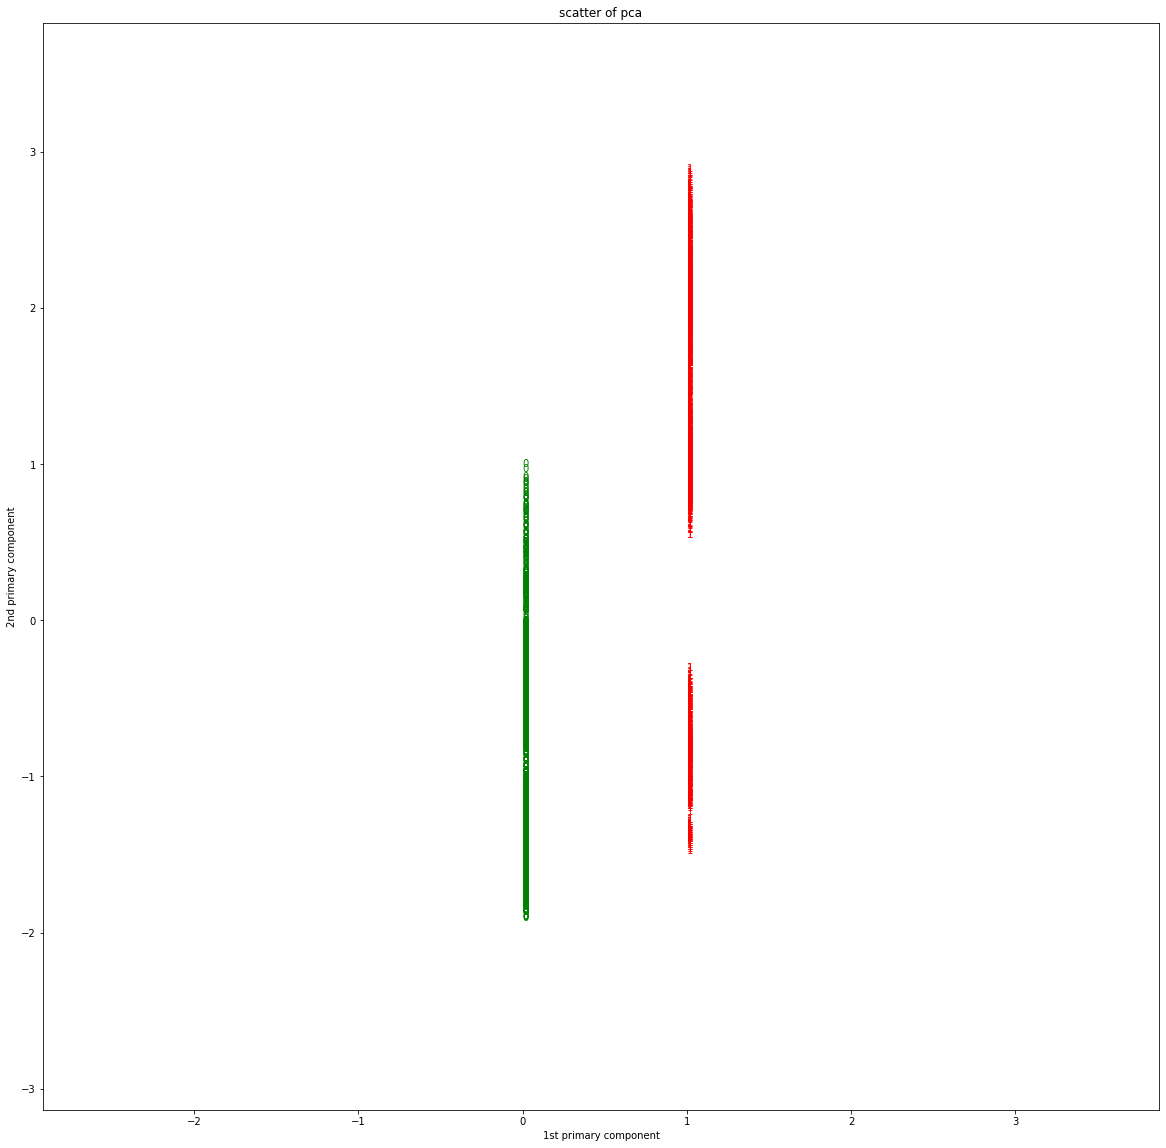

In [19]:
#시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
plt.xlim(pca_result['x1'].min() - 1, pca_result['x1'].max() + 1)
plt.ylim(pca_result['x2'].min() - 1, pca_result['x2'].max() + 1)

for i in range(pca_result.shape[0]):
    if pca_result['class'][i] == 0:
        plt.text(pca_result.iloc[i, 0], pca_result.iloc[i, 1], pca_result['class'][i], color = 'g')
    else:
        plt.text(pca_result.iloc[i, 0], pca_result.iloc[i, 1], pca_result['class'][i], color = 'r')

plt.title('scatter of pca')
plt.xlabel('1st primary component')
plt.ylabel('2nd primary component')

In [20]:
#거의 선형분류가 가능한 데이터라고 봐도 무방하다

##model training

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = dummified_data.loc[:, dummified_data.columns != 'class']
y = dummified_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5686, 116) (2438, 116) (5686,) (2438,)


In [23]:
#xgboost
import xgboost

In [24]:
model = xgboost.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
from sklearn.metrics import accuracy_score 
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat)
proba = pd.DataFrame(model.predict_proba(x_test), columns = ['edible', 'poison'])

In [26]:
acc

1.0

In [27]:
proba['poison']

0       0.000385
1       0.984983
2       0.999583
3       0.999827
4       0.997819
          ...   
2433    0.000798
2434    0.999827
2435    0.999871
2436    0.999154
2437    0.999754
Name: poison, Length: 2438, dtype: float32

In [28]:
#100% 정확도로 분류 완료